In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Load the Data

In [2]:
hr_data = pd.read_csv('./HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### There is no Missing Data in the DataFrame
### We can proceed with Data Preprocessing

## Pre-Processing

In [5]:
# One Hot Encoding the categorical values
hr_data_encoded = pd.get_dummies(hr_data, columns=['sales'])

# salary can be Label Encoded as there is a definitive order to its categorical values, ie. low -> medium -> high
label_encoding = {
    'low': 1,
    'medium': 2,
    'high': 3
}

hr_data_encoded['salary'] = hr_data_encoded['salary'].apply(lambda x: label_encoding[x.lower()])

In [7]:
hr_data_encodedencoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Benchmark (against everyone stays)

In [8]:
Y = hr_data_encoded.left
Y_pred = np.zeros(Y.shape[0])

accuracy_score(Y, Y_pred)

0.7619174611640777

## Visualize the Data

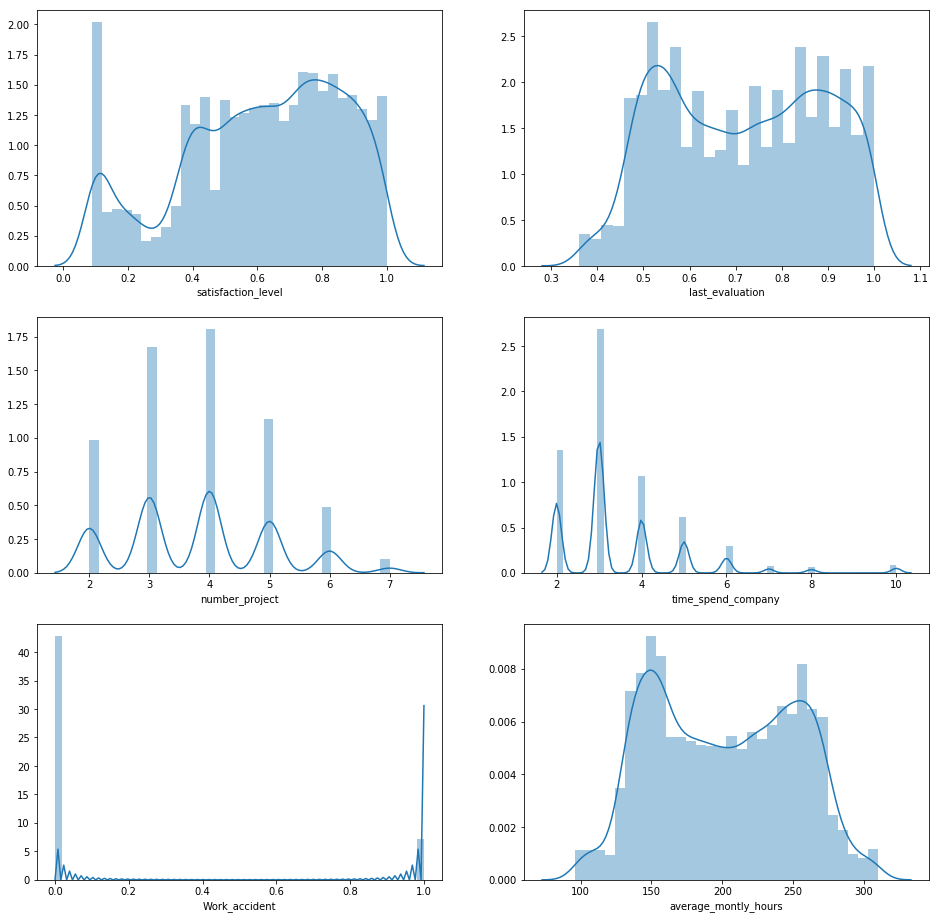

In [9]:
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
sns.distplot(hr_data_encoded.satisfaction_level)
plt.subplot(3, 2, 2)
sns.distplot(hr_data_encoded.last_evaluation)
plt.subplot(3, 2, 3)
sns.distplot(hr_data_encoded.number_project)
plt.subplot(3, 2, 4)
sns.distplot(hr_data_encoded.time_spend_company)
plt.subplot(3, 2, 5)
sns.distplot(hr_data_encoded.Work_accident)
plt.subplot(3, 2, 6)
sns.distplot(hr_data_encoded.average_montly_hours)


## We can scale average_monthly_hours to the range [0, 1] as it as an outlier compared to other features

In [10]:
scaler = MinMaxScaler()

hr_data_encoded.average_montly_hours = scaler.fit_transform(hr_data_encoded[['average_montly_hours']])
hr_data_encoded.average_montly_hours.head()

C:\Users\prabhtaj.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0    0.285047
1    0.775701
2    0.822430
3    0.593458
4    0.294393
Name: average_montly_hours, dtype: float64

In [11]:
hr_data_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,0.285047,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,0.775701,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,0.822430,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,0.593458,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,0.294393,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Train Test Split on Logistic Regression model

In [12]:
X_hr = hr_data_encoded.columns
X_hr = X_hr.drop(['left'])
Y_hr = ['left']

X_df = hr_data_encoded[X_hr].values
Y_df = hr_data_encoded[Y_hr].values.ravel()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, random_state=42, test_size=0.5)

regression_model = LogisticRegression(penalty='l2', solver='newton-cg', fit_intercept=True, C=10)
regression_model.fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = accuracy_score(Y_test, Y_pred)
f_measure = 2 * recall * precision / (precision + recall)
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF-measure: {}'.format(accuracy, precision, recall, f_measure))

Accuracy: 0.7921333333333334
Precision: 0.5936936936936937
Recall: 0.3729485002829655
F-measure: 0.45811609315258955


## Train Test Split on Random Forest Classifier

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, random_state=42, test_size=0.2)

random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, Y_train)
Y_pred = random_forest_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = accuracy_score(Y_test, Y_pred)
f_measure = 2 * recall * precision / (precision + recall)
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF-measure: {}'.format(accuracy, precision, recall, f_measure))

Accuracy: 0.9883333333333333
Precision: 0.9855282199710564
Recall: 0.9645892351274787
F-measure: 0.9749463135289906


## Train Test Split on Multi Layered Perceptron Classifier

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, random_state=42, test_size=0.2)

deep_model = MLPClassifier(solver='adam',
                           alpha=1e-5,
                           hidden_layer_sizes=(100, 50, 10),
                           random_state=1,
                           learning_rate='adaptive',
                           max_iter=500)
deep_model.fit(X_train, Y_train)
Y_pred = deep_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = accuracy_score(Y_test, Y_pred)
f_measure = 2 * recall * precision / (precision + recall)
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF-measure: {}'.format(accuracy, precision, recall, f_measure))

Accuracy: 0.972
Precision: 0.9494219653179191
Recall: 0.9305949008498584
F-measure: 0.9399141630901289


## Cross Validation Results

In [16]:
cv_score_deep_model = cross_val_score(deep_model, X_df, Y_df, cv=5)
cv_score_random_forest_model = cross_val_score(random_forest_model, X_df, Y_df, cv=5)
cv_score_regression_model = cross_val_score(regression_model, X_df, Y_df, cv=5)

In [17]:
print('Cross Validation Scores\nLogistic Regression: {}\nRandom Forest Classifier: {}\nMulti Layered Perceptron: {}'.format(cv_score_regression_model.mean(), cv_score_random_forest_model.mean(), cv_score_deep_model.mean()))

Cross Validation Scores
Logistic Regression: 0.7707100055751858
Random Forest Classifier: 0.9914663553925582
Multi Layered Perceptron: 0.9705987763480122


## Stratified Shuffle Split on data

In [20]:
stratified_splitter = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=1)
stratified_splitter.get_n_splits(X_df, Y_df)
for train_index, test_index in stratified_splitter.split(X_df, Y_df):
    X_train, X_test, Y_train, Y_test = X_df[train_index], X_df[test_index], Y_df[train_index], Y_df[test_index]


In [19]:
deep_model2 = MLPClassifier(solver='adam',
                           alpha=1e-5,
                           hidden_layer_sizes=(100, 50, 10),
                           random_state=1,
                           learning_rate='adaptive',
                           max_iter=500)
deep_model2.fit(X_train, Y_train)
Y_pred = deep_model2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = accuracy_score(Y_test, Y_pred)
f_measure = 2 * recall * precision / (precision + recall)
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF-measure: {}'.format(accuracy, precision, recall, f_measure))

Accuracy: 0.9613333333333334
Precision: 0.9288990825688074
Recall: 0.9070548712206047
F-measure: 0.9178470254957507
